### Употреба и визуелизација на Фуриева и Брза Фуриева Трансформација во делот - "Предпроцесирање на аудио податоци за Deep Learning, врз основа на даден аудио запис"

Првиот чекор од овој процес се состои во вчитување на аудио запис, кој е во формат .mp3.
Станува збор за звук на птици со различни тонски висини.
Со цел понатамошна употреба на функциите од библиотеката libROSA, неопходно е да извршам конверзија на мојата аудио датотека од .mp3 во .wav формат

Читање на .mp3 аудио записот во Jupyter Notebook, се одвива на следниот начин:

In [4]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq
import os
from IPython.display import Audio
folder = os.listdir(os.getcwd())
for files in folder:
    if files.endswith(".mp3"):
        os.startfile(files)
audio = Audio("C:\\Users\\atana\\OneDrive\\Desktop\\Nightingale-sound.mp3")
audio

За извршување на соодветната конверзија, ќе креирам изворна и дестинациска датотека, а за понатамошна обработка на датотеката ќе се служам со променливата "file"


In [2]:
from os import path
from pydub import AudioSegment
                                                                        
source = "C:\\Users\\atana\\OneDrive\\Desktop\\Nightingale-sound.mp3"
destination = "C:\\Users\\atana\\OneDrive\\Desktop\\test.wav"
                                                         
sound = AudioSegment.from_mp3(source)
sound.export(destination, format = "wav")

<_io.BufferedRandom name='C:\\Users\\atana\\OneDrive\\Desktop\\test.wav'>

Откако ќе се прочита аудио датотеката, следно се декларира ратата на семплирање (број на мерења во секунда) и аудио податоците се прикажуваат во форма на еднодимензионална (N, 2) листа (тоа е "signal"), бидејќи станува збор за стерео

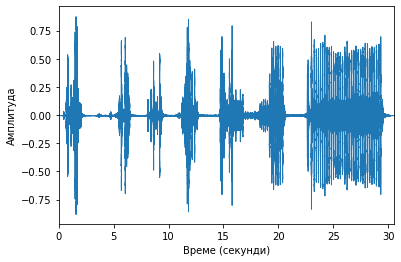

In [5]:
import librosa, librosa.display

file = "C:\\Users\\atana\\OneDrive\\Desktop\\test.wav"
signal,sr = librosa.load(file, sr = 22050) # signal е еднодимензионална низа, a sr е рата на семплирање
librosa.display.waveplot(signal, sr = sr)
plt.xlabel("Време (секунди)")
plt.ylabel("Амплитуда")
plt.show()

Со помош на ФТ, сигналот во временскиот домен се претвора во спектар (збир на фреквенции со соодветни (комплексни ) вредности.

Напомена: Во спектарот не даваме никакви информации за времето!

За да се примени ФТ, потребно е да се земе аудио сигналот, да се подели на мали парчиња (примероци) што се преклопуваат и потоа да се примени Фуриевата трансформација на секој од нив = БФТ

Овој спектар поинаку се нарекува "Моќен спектар" ("Power spectrum")

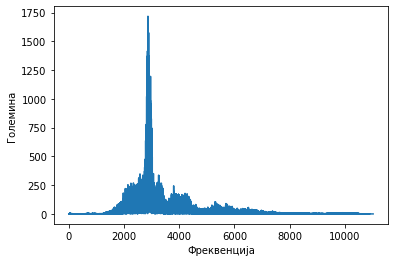

In [6]:
#БФТ -> спектар (power spectrum)
fft = np.fft.fft(signal) 
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude)) 
left_frequency = frequency[:int(len(frequency)/2)] # потребна ни е само втората половина од фреквенцијата
left_magnitude = magnitude[:int(len(magnitude)/2)] # и само втората половина од големината
plt.plot(left_frequency, left_magnitude)
plt.xlabel("Фреквенција")
plt.ylabel("Големина")
plt.show()

За секој примерок, се пресметува БФТ.

БФТ враќа и позитивни и негативни фреквенции, при што потребни се само позитивните М / 2 фреквенции.

Спектрограм ги претставува фреквенциите на даден сигнал со времето.
Истиот содржи една оска - време, втора оска - фреквенции и боите кои ја претставуваат амплитудата на набудуваната фреквенција во одредено време. Со светли бои се означени силните фреквенции, додека темните се индикатор за ниски фреквенции.

Најпрво, се применува Short - time Fourier Transform на спектарот, која што ја дава временски локализирана информација за фреквенцијата во ситуации каде што компонентите на фреквенцијата варираат.
Истото е прикажано на следниот спектограм

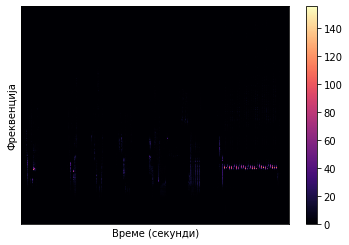

In [7]:
# Short time Fourier Transform to spectogram
n_fft = 2048 # number of samples (the window of single fft)
hop_length = 512 # shiftiranje na fft na desno
stft = librosa.core.stft(signal, hop_length = hop_length, n_fft = n_fft)
spectrogram = np.abs(stft)
# за претставување на heat мапа:
librosa.display.specshow(spectrogram, sr = sr,hop_length = hop_length )
plt.xlabel("Време (секунди)")
plt.ylabel("Фреквенција")
plt.colorbar()
plt.show()

Од heat мапата забележуваме дека повеќето од фреквенциите (прикажани во црна боја) имаат многу ниски амплитуди.

За таа цел потребно е да се земат амплитудите од оргиналниот спектар и истите да се трансфоримираат во децибели (dB). 
За да се изврши истото, мора да се користи логаритам

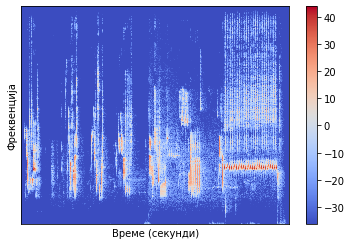

In [8]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, sr = sr,hop_length = hop_length )
plt.xlabel("Време (секунди)")
plt.ylabel("Фреквенција")
plt.colorbar()
plt.show()

Од спектограмот се забележува дека во оваа аудио датотека доминираат примероците кои одговараат на -30 dB, според скалата на бои.

Земајќи во предвид дека значително голем дел од овој сегмент е лично моја имплементација и код, искоритен е и кодот од долунаведената литература.
###### Користена литература (за код):
1. https://mwouts.github.io/elegant-scipy-as-a-jp-book/ch4.html
2. https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520

###### Користена литература (за теорија):
https://www.sciencedirect.com/topics/engineering/short-time-fourier-transform

###### Аудио датитеката е преземена од следната страна:
https://orangefreesounds.com/nightingale-sound/